<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/python-code-for-FinancialAnalysis-book/blob/master/2020_6_1_chap2_flow_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=c0b646d756909fe2ff17f010969d321aedbccc412d286daafbb2de27d6ca10d7
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
pip install requests

In [ ]:
pip install bs4

In [ ]:
#Last Update:Jun-07-2020
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt#get current date
import pandas as pd
import requests
from bs4 import BeautifulSoup
from google.colab import files

In [ ]:
#url: url that beautifulsoup will analyze
#beautifulsoup html will not look like soure
#review beautifulsoup html to use find and findall
def html_beautifulsoup(url):
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html,"lxml")
    return soup

#soup_html: soup html is not same as source html
def yahoo_description(soup_html):
    #element that has ticker description 
    element = soup_html.find('h1',class_='D(ib) Fz(16px) Lh(18px)')
    return element.text  

In [ ]:
#graph historical values of ticker
def graph_ticker(Ticker, time_interval, start_t, end_t): 
  Data=yf.download(Ticker,start=start_t,end=end_t,interval = time_interval)
  Adjclose=Data['Adj Close']
  Dr = Adjclose.dropna()
  soup_html = html_beautifulsoup("https://finance.yahoo.com/quote/"  + Ticker)

 #graph ticker
  plt.figure(figsize=(15,10))
  plt.style.use('seaborn-whitegrid')#set the background to be grid
  plt.xticks(rotation=90)# rotate the ylim so that it does not look too tight
  plt.title(start_t+' to '+end_t,fontsize=16)
  plt.suptitle(yahoo_description(soup_html),fontsize=24)
  
  plt.plot(Dr)

  plt.legend(labels =['Ticker Value'],fontsize=15,  loc=0)
  plt.ylabel('Value',fontsize=13)
  plt.xlabel('Date',fontsize = 13)

  print("")
  print("")

  plt.show()

  #print data set
  Dr = pd.DataFrame(Dr)
  Dr = Dr.sort_values(by='Date', ascending=False)
  pd.set_option('display.max_rows', None)
  Dr = Dr['Adj Close'].round(decimals=2) # rounding results in a series
  Dr = pd.DataFrame(Dr) # convert to dataframe to print header
  print(Dr)


In [ ]:
Dr.to_csv('flowchart.csv') 
files.download('flowchart.csv')

Please enter ticker(Default = JNJ)-->
Enter start date(Default = 5 Years ago, 2015-06-10)-->
Enter end date(Default = Yesterday, 2020-06-07)-->
Enter date interval(1d,1wk,1mo Default = 1mo)-->

[*********************100%***********************]  1 of 1 completed




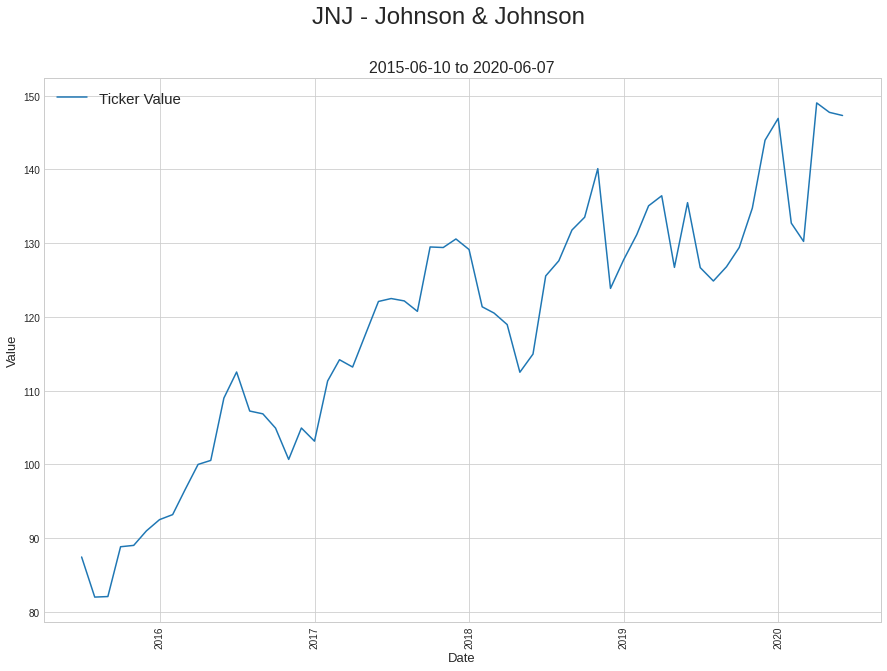

            Adj Close
Date                 
2020-06-01     147.30
2020-05-01     147.73
2020-04-01     149.01
2020-03-01     130.23
2020-02-01     132.71
2020-01-01     146.91
2019-12-01     143.95
2019-11-01     134.74
2019-10-01     129.40
2019-09-01     126.80
2019-08-01     124.86
2019-07-01     126.67
2019-06-01     135.48
2019-05-01     126.71
2019-04-01     136.42
2019-03-01     135.06
2019-02-01     131.14
2019-01-01     127.73
2018-12-01     123.86
2018-11-01     140.10
2018-10-01     133.51
2018-09-01     131.77
2018-08-01     127.60
2018-07-01     125.55
2018-06-01     114.96
2018-05-01     112.49
2018-04-01     118.95
2018-03-01     120.51
2018-02-01     121.36
2018-01-01     129.13
2017-12-01     130.56
2017-11-01     129.40
2017-10-01     129.48
2017-09-01     120.74
2017-08-01     122.16
2017-07-01     122.48
2017-06-01     122.09
2017-05-01     117.58
2017-04-01     113.20
2017-03-01     114.19
2017-02-01     111.30
2017-01-01     103.14
2016-12-01     104.93
2016-11-01

In [ ]:
#initialize dates
previousday = dt.date.today()-dt.timedelta(days=1)# get the date of previous day
Default_end = previousday.strftime("%Y-%m-%d") # change the format of the default datetime 
years_ago = dt.date.today()-dt.timedelta(days=5 * 365)
Default_start = years_ago.strftime("%Y-%m-%d")

# request user input
# set default values if users does not enter a value
Ticker = input('Please enter ticker(Default = JNJ)-->') or 'JNJ'
Start = input('Enter start date(' + 'Default = 5 Years ago, ' + Default_start + ')-->') or Default_start
End = input('Enter end date(Default = Yesterday, ' + Default_end + ')-->') or Default_end
T_interval = input('Enter date interval(1d,1wk,1mo Default = 1mo)-->') or '1mo'

print("")

graph_ticker(Ticker, T_interval,Start,End)

print("")
print("")